<a href="https://colab.research.google.com/github/k2moon/bigbungi/blob/main/numpy-v2/numpy02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 넘파이의 자료형

## 넘파이의 자료형 dtype

- 넘파이의 배열 즉, `ndarray`클래스는 원소가 모두 같은 자료형
- `array` 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면 `dtype` 인수를 사용
- `dtype` 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추
- 만들어진 배열의 자료형을 알아내려면 `dtype` 속성 확인

In [2]:
import numpy as np
# 경고 메시지 숨기기
#import warnings
#warnings.filterwarnings(action='ignore')
np.__version__

'1.23.5'

In [ ]:
x = np.array([1, 2, 3])
x.dtype

dtype('int32')

In [ ]:
x = np.array([1.0, 2.0, 3.0])
x.dtype

dtype('float64')

In [ ]:
x = np.array([1, 2, 3.0])
x.dtype

dtype('float64')

### dtype 표
- `dtype` 인수로 지정할 자료형은 다음 표에 보인것과 같은 "dtype 접두사"로 시작하는 문자열
- 뒤에 오는 숫자는 바이트 수 혹은 글자 수를 의미, `f8`은 8바이트(64비트) 부동소수점 실수, `U4` 는 4글자 유니코드 문자열
- 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정

| dtype 접두사 | 설명 | 사용 예 |
|-|-|-|
| `b` | 불리언 | `b` (참 혹은 거짓) |
| `i` | 정수 | `i8` (64비트) |
| `u` | 부호 없는 정수 | `u8` (64비트) |
| `f` | 부동소수점 | `f8` (64비트) |
| `c` | 복소 부동소수점 | `c16` (128비트) |
| `O` | 객체 | `0` (객체에 대한 포인터) |
| `S` | 바이트 문자열 | `S24` (24 글자) |
| `U` | 유니코드 문자열 | `U24` (24 유니코드 글자) |

In [ ]:
x = np.array([1, 2, 3], dtype='f')
x.dtype, x

(dtype('float32'), array([1., 2., 3.], dtype=float32))

In [ ]:
x[0] + x[1]

3.0

In [ ]:
x = np.array(['홍', '길', '동'], dtype='U')
x.dtype, x

(dtype('<U1'), array(['홍', '길', '동'], dtype='<U1'))

In [ ]:
x[0] + x[1] + x[2]

'홍길동'

## `Inf`와 `NaN`

- `Inf` : 무한대
- 'NaN` : 정의할 수 없는 수

In [ ]:
# inf
np.array([10]) / 0

C:\Users\1\AppData\Local\Temp\ipykernel_5544\2787428192.py:2: RuntimeWarning: divide by zero encountered in divide
  np.array([10]) / 0


array([inf])

In [ ]:
import warnings
# 경고 메시지 숨기기
warnings.filterwarnings(action='ignore')

In [ ]:
# nan
np.array([0]) / 0

array([nan])

In [ ]:
np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

array([  0.,  inf, -inf,  nan])

In [ ]:
np.log(0)

-inf

In [ ]:
np.exp(np.inf), np.exp(-np.inf)

(inf, 0.0)

## 다양한 배열 생성


* `zeros`, `ones`
* `zeros_like`, `ones_like`
* `empty`
* `arange`
* `linspace`, `logspace`

### `zeros`

- 크기가 정해져 있고 모든 값이 0인 배열을 생성

In [ ]:
a = np.zeros(5)
a

array([0., 0., 0., 0., 0.])

- tuple or list로 다차원 배열 생성

In [ ]:
a = np.zeros((2, 3))
b = np.zeros([2, 3])
a, b

(array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.]]))

- `dtype` 지정 가능

In [ ]:
a = np.zeros((3, 2), dtype="i")
a

array([[0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

### ones

- 1로 초기화된 배열을 생성

In [ ]:
a = np.ones((2, 3, 4), dtype="i8")
a

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int64)

### `zeros_like`, `ones_like`

- 다른 배열과 같은 크기의 배열을 생성

In [ ]:
a = np.array([
    [1,2,3],
    [4,5,6]
])
b = np.zeros_like(a, dtype="f")
c = np.ones_like(a, dtype="f")
b,c

(array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32))

### `empty`

- 빠르게 새열을 생성 하기 위해 초기화 하지 않은 배열 생성
- 생성된 배열에는 기존에 메모리에 저장되어 있는 값은 쓰레기 값

In [ ]:
a = np.empty((3, 3))
a

array([[4.67296746e-307, 1.69121096e-306, 1.89146896e-307],
       [7.56571288e-307, 3.11525958e-307, 1.24610723e-306],
       [1.29061142e-306, 1.29061142e-306, 5.53353523e-322]])

### `arange`

- 파이썬의 `range` 함수

In [ ]:
np.arange(10)  # 0 .. n-1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(1, 10, 2)  # 시작, 끝(포함하지 않음), 단계

array([1, 3, 5, 7, 9])

### `linspace`, `logspace`

- `linspace` , `logspace` 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할 값으로 배열 생성

In [ ]:
np.linspace(0, 100, 5)  # 시작, 끝(포함), 갯수

array([  0.,  25.,  50.,  75., 100.])

In [ ]:
np.logspace(0.1, 1, 10)

array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])

## 전치 연산 `T`

- 2차원 배열의 전치(transpose) 연산은 행과 열을 바꾸는 작업

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## 배열의 크기 변형 `reshape`

- 배열의 차원 변경
- (12,1) -> (3,4) -> (2, 6) -> (4,3)

In [3]:
a = np.arange(12)
a.shape, a

((12,), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [4]:
b = a.reshape(3, 4)
b, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

In [ ]:
c = b.reshape(2, 6)
c.shape, c

((2, 6),
 array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]]))

In [ ]:
d = c.reshape(4, 3)
d.shape, d

((4, 3),
 array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]))

- -1의 사용

In [ ]:
a.reshape(3, -1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
a.reshape(2, 2, -1)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [ ]:
a.reshape(2, -1, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

### `flatten` or `ravel`

- 다차원 배열을 무조건 1차원으로 변경

In [6]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
b.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### 배열 사용에서 주의할 점
- 길이가 5인 1차원 배열과 행
- 열의 갯수가 (5,1)인 2차원 배열 또는 행
- 열의 갯수가 (1, 5)인 2차원 배열
- 데이터가 같아도 엄연히 다른 객체

In [8]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [9]:
x.reshape(1, 5)

array([[0, 1, 2, 3, 4]])

In [10]:
x.reshape(5, 1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

### `newaxis`

- 배열에 대해 차원만 1차원 증가

In [11]:
x[:, np.newaxis] # (5, 1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [12]:
x[np.newaxis, :] # (1, 5)

array([[0, 1, 2, 3, 4]])

## 배열 연결

행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용

* `hstack`
* `vstack`
* `dstack`
* `stack`
* `tile`

### `hstack`

- 행의 수가 같은 두 개 이상의 배열을 옆으로 연결
- 열의 수가 더 많은 배열 생성
- 연결할 배열은 하나의 리스트에 담아서 전달

In [13]:
h1 = np.ones((2, 3))
h1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [14]:
h2 = np.zeros((2, 2))
h2

array([[0., 0.],
       [0., 0.]])

In [32]:
h = np.hstack([h1, h2])
h.shape, h

((2, 5),
 array([[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.]]))

### `vstack`

- 열의 수가 같은 두 개 이상의 배열을 위아래로 연결
- 행의 수가 더 많은 배열 생성
- 연결할 배열은 하나의 리스트에 담아서 전달

In [16]:
v1 = np.ones((2, 3))
v1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [17]:
v2 = np.zeros((3, 3))
v2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
v = np.vstack([v1, v2])
v.shape, v

((5, 3),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

### `dstack`

- 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 연결
- 가장 안쪽의 원소의 차원이 증가

In [19]:
d1 = np.ones((3, 4))
d1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [33]:
d2 = np.zeros((3, 4))
d2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [37]:
d = np.dstack([d1, d2])
d.shape, d

((3, 4, 2),
 array([[[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]],
 
        [[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]],
 
        [[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]]]))

### `stack`

- 사용자가 지정한 차원(축으로) 배열을 연결
- `axis` 인수를 사용
- 디폴트 인수값은 0

In [39]:
s = np.stack([d1, d2])
s.shape, s

((2, 3, 4),
 array([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]))

In [40]:
s = np.stack([d1, d2], axis=0)
s.shape, s

((2, 3, 4),
 array([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]))

- `axis` 인수가 1이면 두번째 차원으로 새로운 차원이 삽입

In [43]:
s = np.stack([d1, d2], axis=1)
s.shape, s

((3, 2, 4),
 array([[[1., 1., 1., 1.],
         [0., 0., 0., 0.]],
 
        [[1., 1., 1., 1.],
         [0., 0., 0., 0.]],
 
        [[1., 1., 1., 1.],
         [0., 0., 0., 0.]]]))

- `axis` 인수가 2이면 세번째 차원으로 새로운 차원이 삽입

In [44]:
s = np.stack([d1, d2], axis=2)
s.shape, s

((3, 4, 2),
 array([[[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]],
 
        [[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]],
 
        [[1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.]]]))

### `tile`

- 동일한 배열을 반복하여 연결

In [45]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [46]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

**연습**
- 지금까지 공부한 명령어를 사용하여 다음과 같은 배열을 만들어라.

```
array([[   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [  10.,   20.,   30.,   40.,   50.],
       [  60.,   70.,   80.,   90.,  100.],
       [ 110.,  120.,  130.,  140.,  150.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [  10.,   20.,   30.,   40.,   50.],
       [  60.,   70.,   80.,   90.,  100.],
       [ 110.,  120.,  130.,  140.,  150.]])
```


In [50]:
a = np.zeros((3,3))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [58]:
b = np.ones((3,2))
b

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [61]:
c = np.hstack([a,b])
c

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [65]:
d = np.arange(10,160,10)
d

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])

In [67]:
e = d.reshape(3,-1)
e

array([[ 10,  20,  30,  40,  50],
       [ 60,  70,  80,  90, 100],
       [110, 120, 130, 140, 150]])

In [68]:
rs = np.vstack([c,e,c,e])
rs

array([[  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 60.,  70.,  80.,  90., 100.],
       [110., 120., 130., 140., 150.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 60.,  70.,  80.,  90., 100.],
       [110., 120., 130., 140., 150.]])

## 2차원 그리드 포인트 생성

- 변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 2차원 영역에 대한 (x,y) 좌표값 쌍
- 그리드 포인트(grid point)를 생성
- $$ (x,y) = (0,0), (0,1), (0,2), (0,3), (0,4), (1,0), \cdots (2,4) $$

### `meshgrid`

- 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력
- 결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력

In [69]:
x = np.arange(3)
x

array([0, 1, 2])

In [70]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [71]:
X, Y = np.meshgrid(x, y)

In [72]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [73]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [74]:
[list(zip(x, y)) for x, y in zip(X, Y)]

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

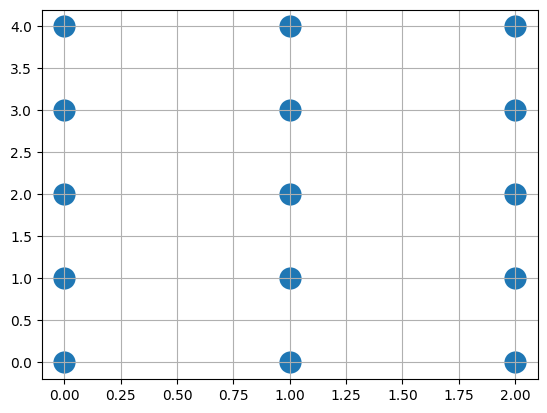

In [77]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.scatter(X, Y, linewidths=10);